# 캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction
* https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr
---
### Introduction   
* 본 대회는 구글 코리아가 후원하고, 캐글 코리아(비영리 페이스북 온라인 커뮤니티)가 진행하는 데이터 사이언스 대회입니다. Academic 목적이며, 대한민국 누구나 참여하실 수 있습니다.   

### 참여 방법   
* 다음 링크를 눌러 대회 페이지에 다시 들어오셔야 참여 가능합니다. 무분별한 외국인들의 참가를 방지하기 위함입니다.   
* https://bit.ly/2UuQvtU   

### Competition background   
* 내 집 마련의 꿈은 누구나 가지고 있습니다. 하지만 집의 가격은 누구나 알고 있지는 않죠. 집의 가격은 주거 공간의 면적, 위치, 경관, 건물의 연식 등 여러 가지 복잡한 요인의 조합에 의해 결정됩니다. 이번에 분석하실 데이터는 20개의 변수를 가지고 있으며, 어떤 조건을 가진 집의 가격이 높고 낮은지를 예측하는 모델을 만드는 것을 목표로 합니다. 이번 대회는 리더보드 점수뿐만 아니라 캐글의 공유 정신의 기본인 커널 작성을 장려하는 목표를 가지고 있습니다.  


## Step 0. 데이터 살펴보기
* data fields에서 ID에 대한 price를 예측해야 한다.

---
### File descriptions   
* train.csv - 예측 모델을 만들기 위해 사용하는 학습 데이터입니다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있습니다.
* test.csv - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터 입니다.
* sample_submission.csv - 제출시 사용할 수 있는 예시 submission.csv 파일입니다.   
### Data fields
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 집의 가격(Target variable)
4. bedrooms : 침실의 수
5. bathrooms : 화장실의 수
6. sqft_living : 주거 공간의 평방 피트(면적)
7. sqft_lot : 부지의 평방 피트(면적)
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트(면적)
14. sqft_basement : 지하실의 평방 피트(면적)
15. yr_built : 지어진 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

## Step 1. 라이브러리, 데이터 가져오기
* 데이터를 가져오기 위한 os모듈, csv파일을 다루기 위한 pandas, numpy, 결측치 확인을 위한 missingno, 모델 학습을 위한 모듈(gradientboost,xgb,lgb) 등을 import 해준다.

In [7]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('얍💢')

얍💢


## Step 2. 데이터 전처리
* train dataset의 date 항목 날짜가 앞부분 6글자를 제외한 뒷부분은 불필요한 요소라고 생각되어 이부분을 lambda 함수와 pd.apply 함수를 이용하여 초기화 시켰다.
* train dataset의 price 항목은 y_train 값으로 사용하기위해 따로 분리시키고 train 데이터셋에서는 del 함수를 이용하여 삭제했다.
* train dataset과 test dataset을 pd.contact() 함수를 이용하여 합체했다.
* train dataset에서 id 항목을 sub_id로 따로 분리시키고 나중에 사용하려했으나 사용하지 않았다.

### Step 2-1. 결측치 확인
* missingno 모듈의 matrix 함수를 이용하여 결측 상태 시각화

<AxesSubplot:>

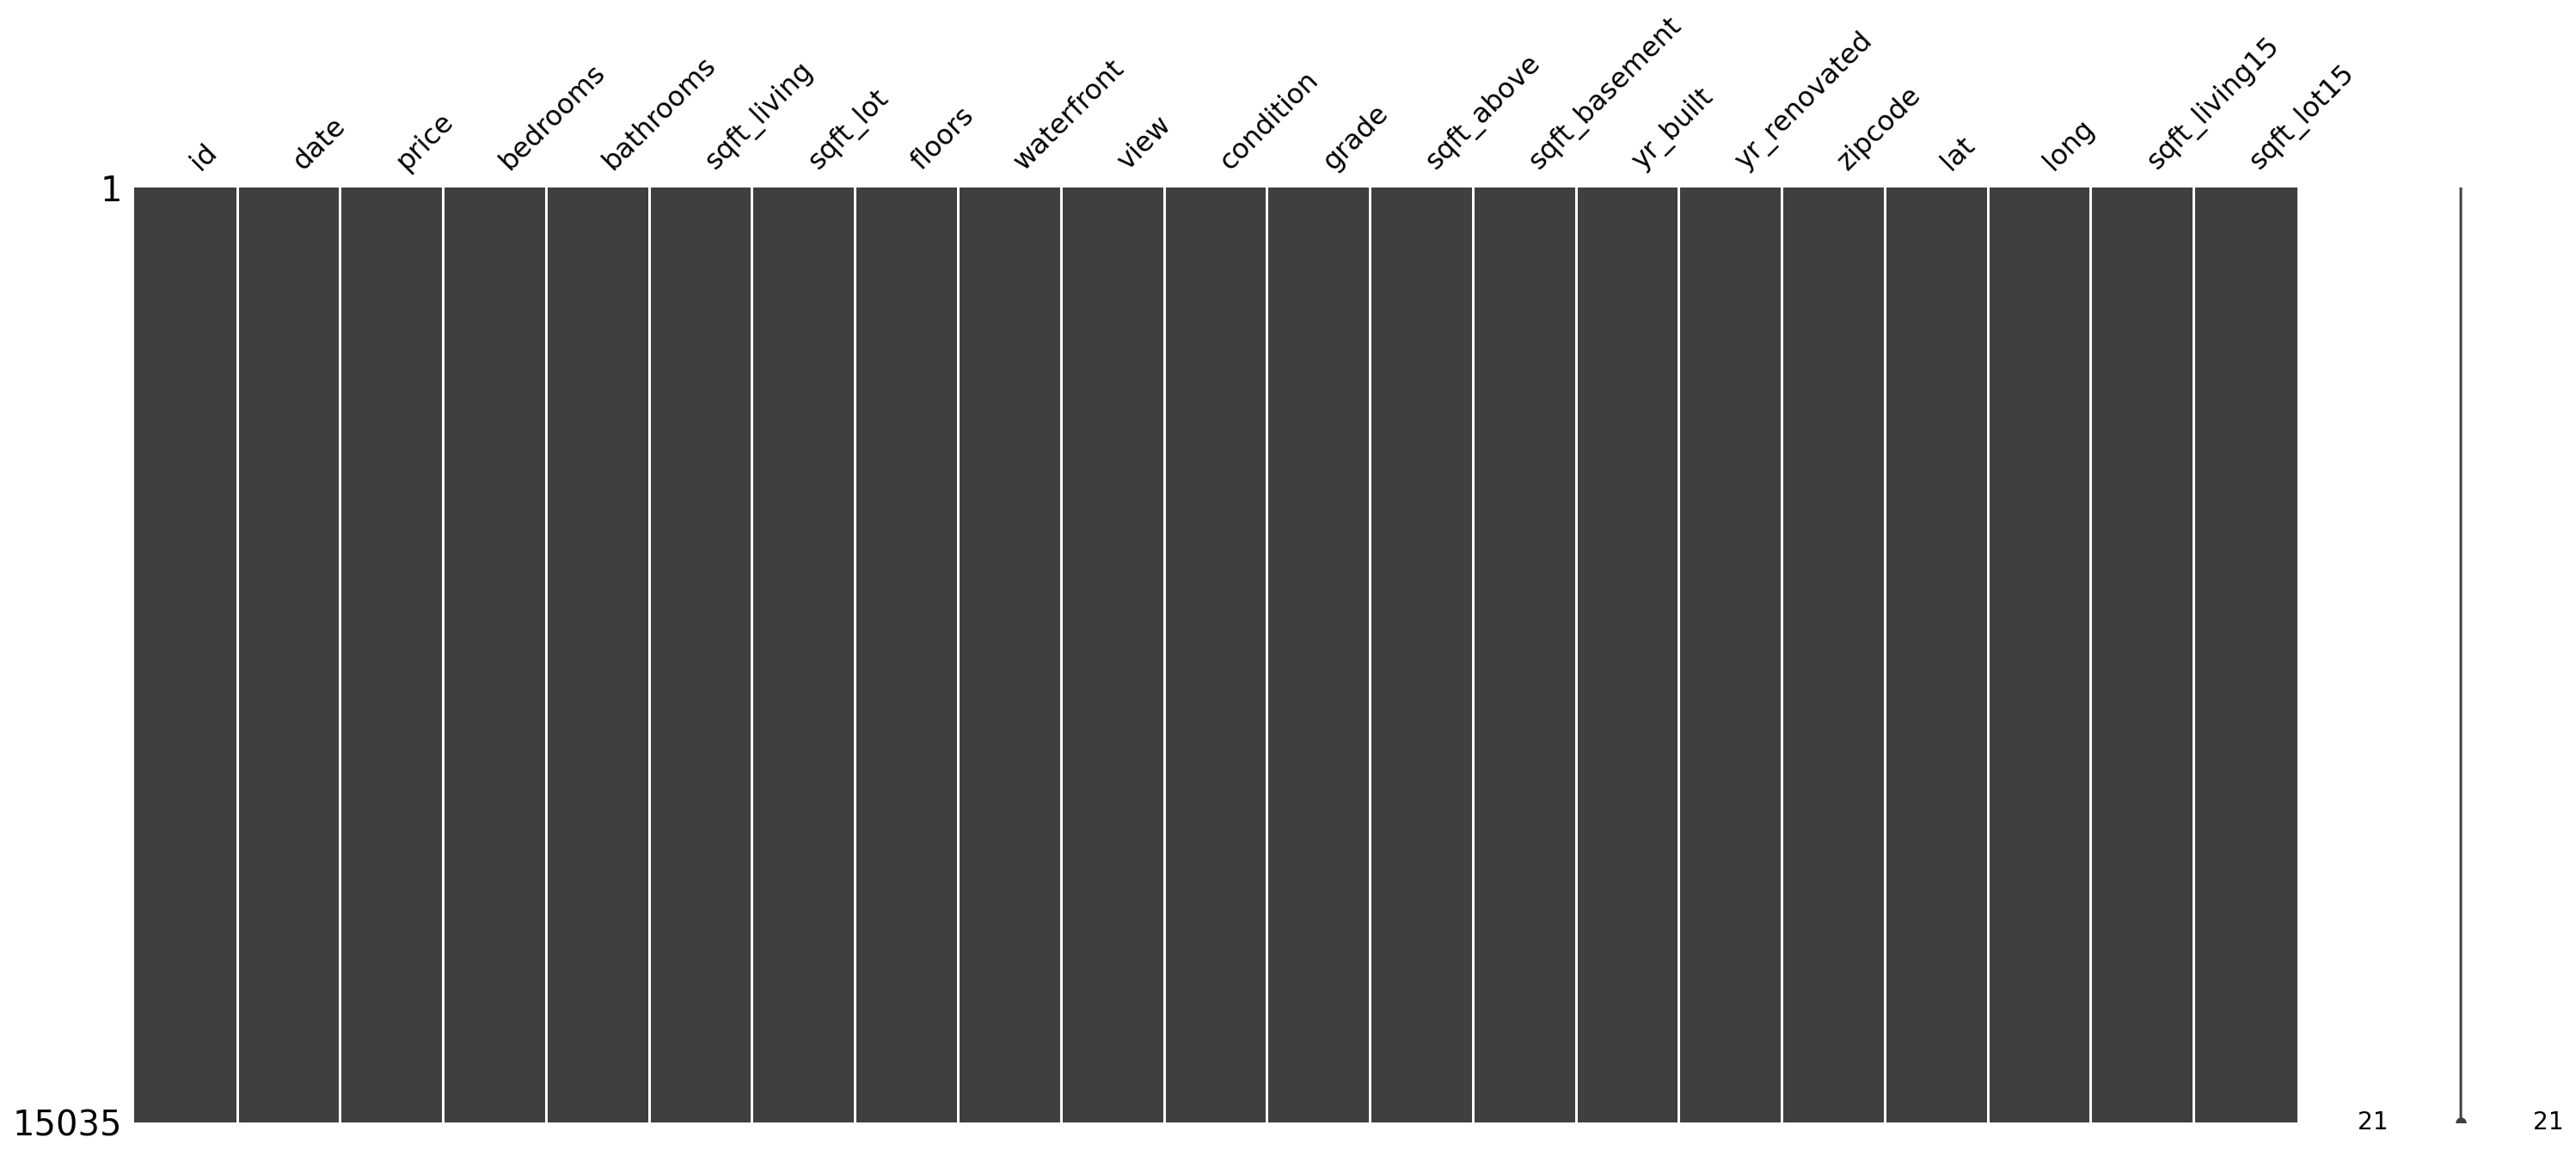

In [11]:
msno.matrix(train)

모든 변수에 결측치가 없는 것으로 보인다.

In [14]:
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))

id : 0
date : 0
price : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [15]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### Step 2-2. ID, date 변수 정리

In [16]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [17]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [18]:
data = pd.concat((train, test), axis=0)
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [19]:
train_len = len(data)
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [20]:
sub_id.head()

Series([], Name: id, dtype: int64)

In [21]:
train_len = len(train)
sub_id = train['id'][train_len:]


print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [22]:
del train['id']

In [23]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [24]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

### Step 2-3. 각 변수들의 분포 확인

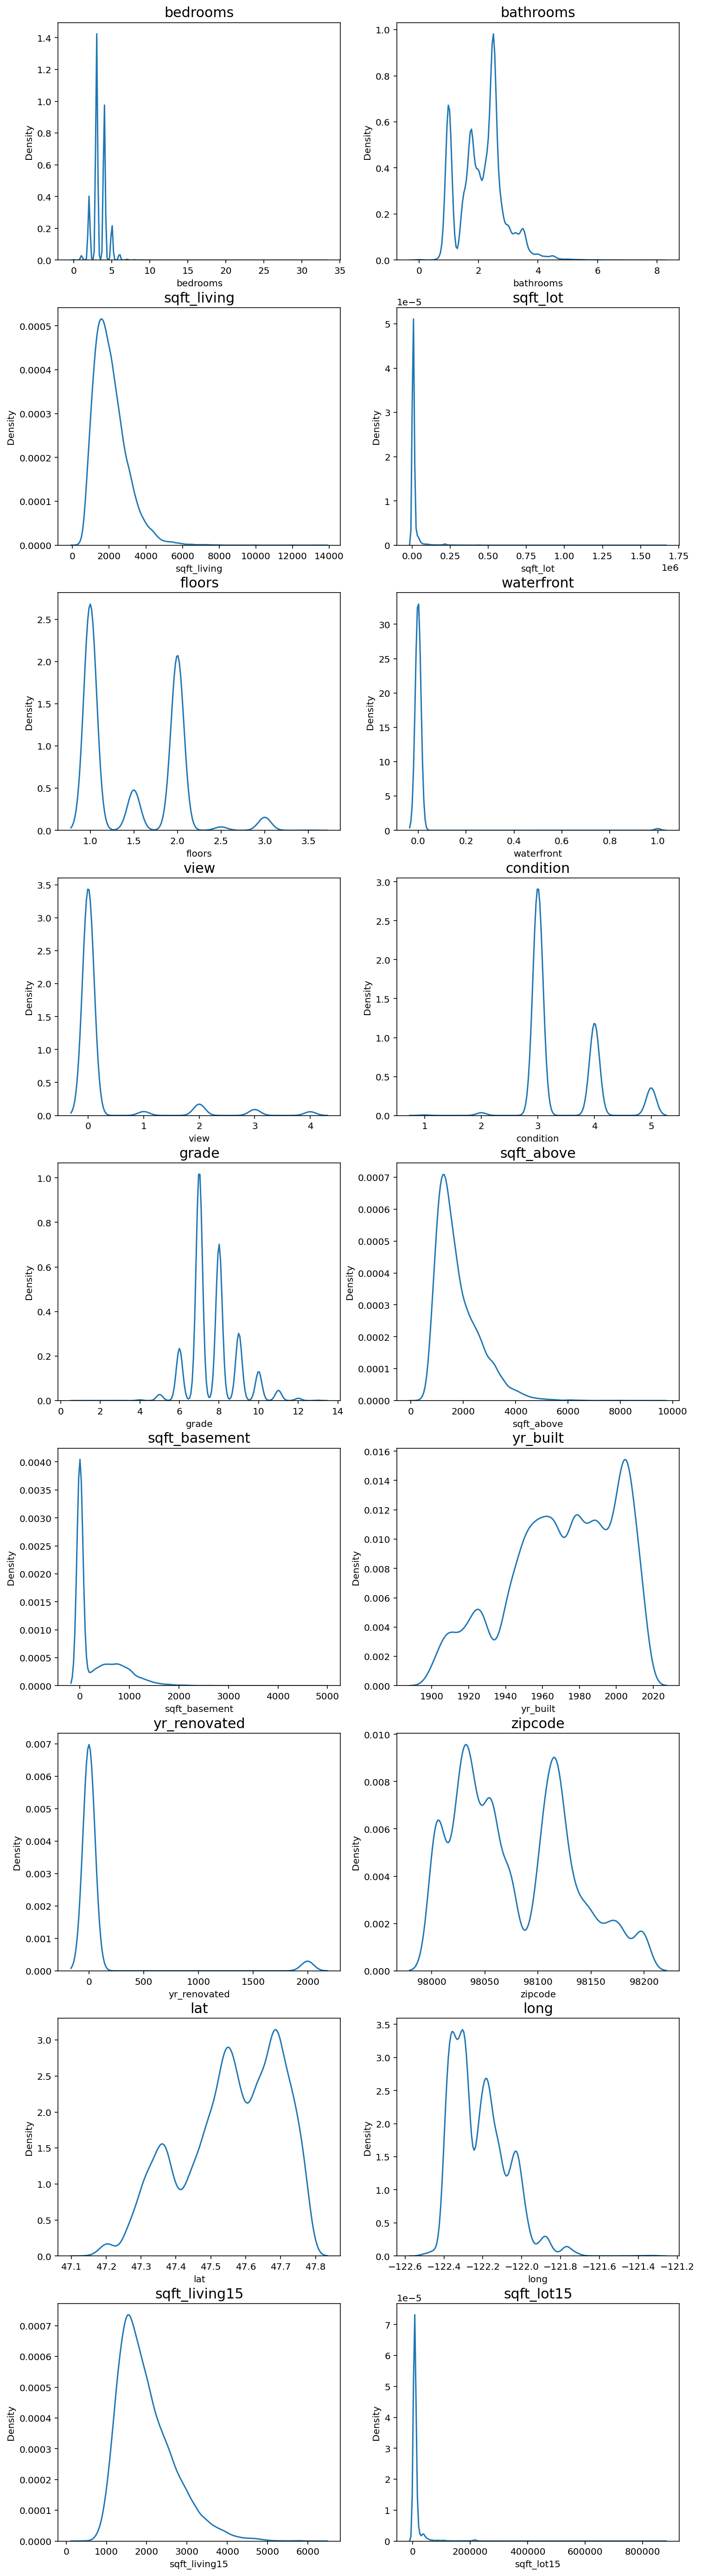

In [25]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

* price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement 변수가 한쪽으로 치우친 경향을 보였다.
* log-scaling을 통해 데이터 분포를 정규분포에 가깝게 만들어 본다.

In [26]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

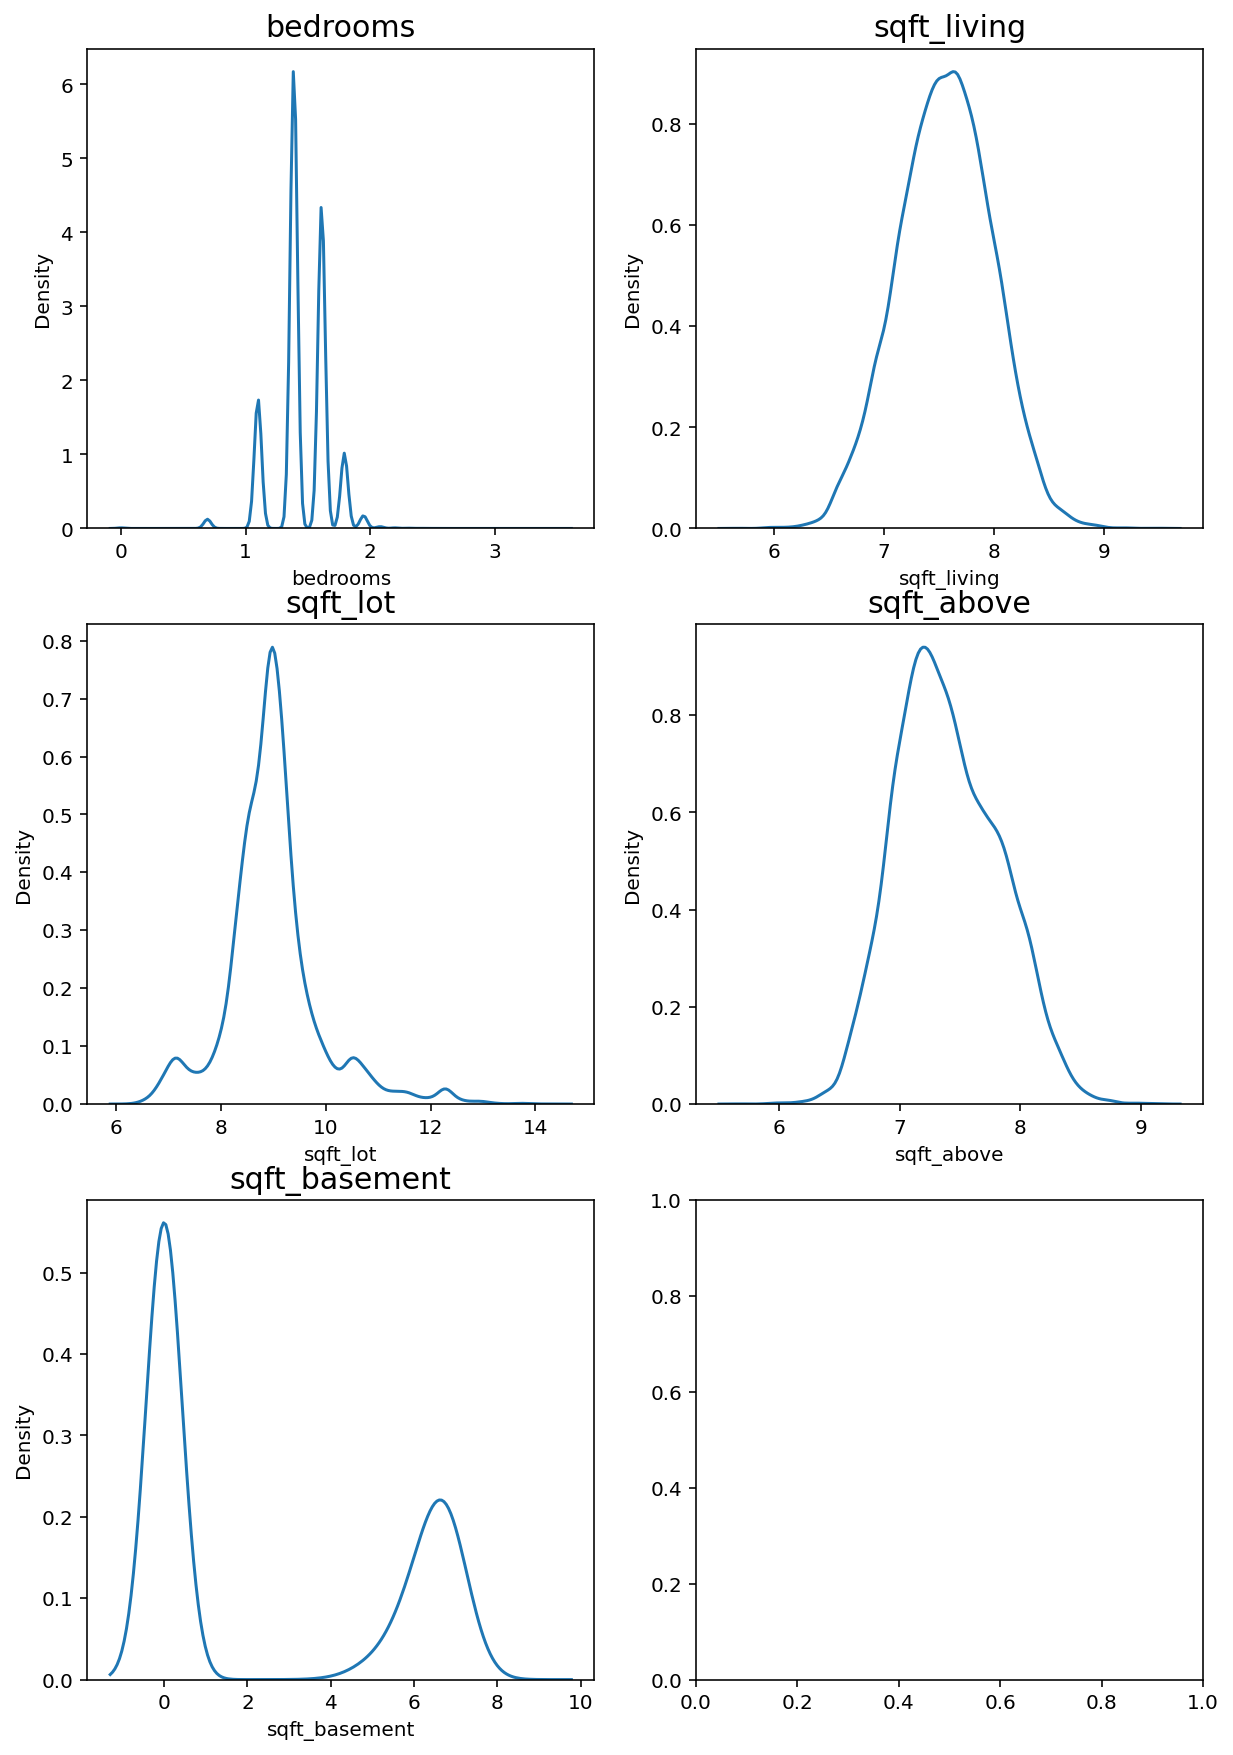

In [27]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1


* 어느정도 정규분포화 되었다.

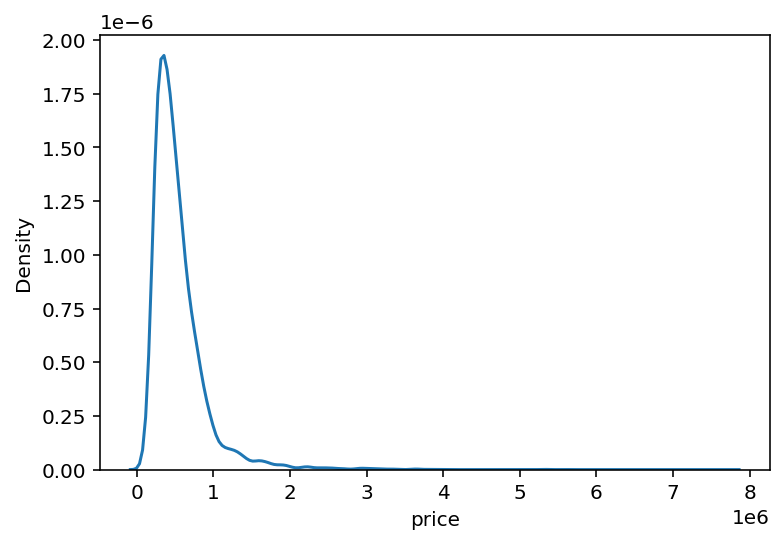

In [28]:
sns.kdeplot(y)
plt.show()

In [29]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

In [30]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

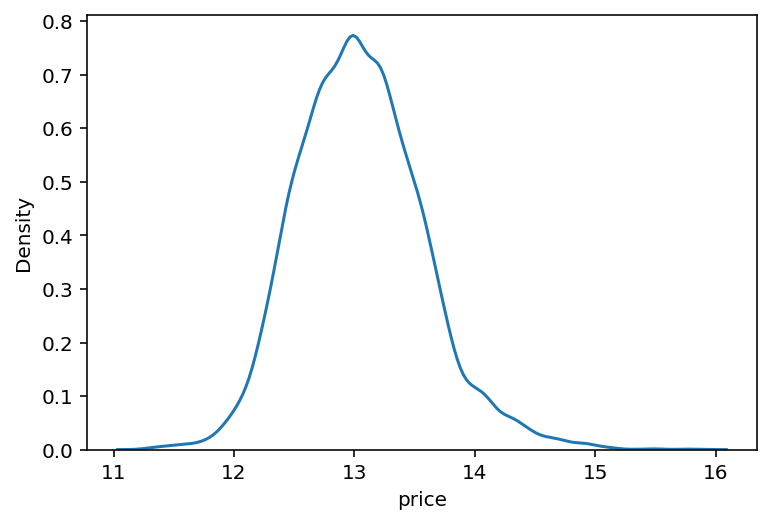

In [31]:
sns.kdeplot(y)
plt.show()

* y값도 log를 씌워 정규분포화 해준다. y 값을 확인해보면 12.xx, 13.xx 값이 나오는 것을 볼 수 있는데, 이는 나중에 꼭 로그를 벗겨주어야 학습 후에 예측값도 12.xx, 13.xx 값이 나오지 않고 정상치가 나온다.

In [32]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## Step 3. 다양한 실험을 위한 함수 만들기
* gboost, xgboost, lightgbm, rdforest 모델을 테스트해본다. 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


In [35]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('얍💢')

얍💢


In [36]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


In [37]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


In [38]:
gboost.__class__.__name__

'GradientBoostingRegressor'

### Step 3-1. 다양한 함수 RMSE 값 얻기
* gboost, xgboost, lightgbm, rdforest 모델의 RMSE 값을 확인한다. 

In [39]:
df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

* 위 과정을 get_scores() 함수로 만들었다.
* GradientBoosting 모델과 RandomFroest 모델은 RMSE 값이 높게 나와서 결국 제외시키기로 했다.

In [41]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

### Step 3-2. 함수들의 최적 하이퍼 파라미터 탐색 ! 그리드 탐색
* 먼저 최적 하이퍼 파라미터 탐색을 해주는 그리드 탐색 함수를 만들기 위해 GridSearchCV 모듈을 import 해준다.
* LGBM 모델로 그리드 탐색 연습을 해보았다.

In [42]:
from sklearn.model_selection import GridSearchCV

print('얍💢')

얍💢


In [43]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 30, 50],
    'learning_rate' : [0.1, 0.01],
}

In [31]:
model = LGBMRegressor(random_state=random_state)
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.3s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   11.1s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [10, 30, 50],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error', verbose=1)

totalling 20 fits = 위에서 우리가 입력한 param_grid에 n_estimators 두 가지, max_depth 두 가지를 넣었으므로 가능한 조합은 총 2 × 2 = 4가지입니다.     

또한, cross validation은 각 경우마다 5번을 진행하니 총 20 fits를 진행하게 됩니다.

In [32]:
grid_model.cv_results_

{'mean_fit_time': array([0.21124873, 0.44221005, 0.70794611, 0.19648571, 0.42807274,
        0.71511335, 0.17989898, 0.43850403, 0.73319659, 0.22998466,
        0.58649664, 0.93611794, 0.23187947, 0.61617284, 1.05377512,
        0.23010426, 0.59775023, 0.95549593]),
 'std_fit_time': array([0.01816546, 0.01612865, 0.05356719, 0.01798323, 0.03226996,
        0.06549418, 0.03544678, 0.04154032, 0.02417249, 0.00882768,
        0.03531733, 0.02619687, 0.00992193, 0.01609185, 0.04202862,
        0.01571835, 0.04988785, 0.06579952]),
 'mean_score_time': array([0.01646271, 0.04147692, 0.06501179, 0.01509819, 0.04144869,
        0.06533179, 0.01604791, 0.04326143, 0.0630621 , 0.01246085,
        0.03941603, 0.06866746, 0.01369147, 0.04061084, 0.07125783,
        0.01309128, 0.04065785, 0.06471453]),
 'std_score_time': array([0.00052357, 0.00216665, 0.00182515, 0.00093585, 0.0019477 ,
        0.00676826, 0.00145073, 0.00302495, 0.00342521, 0.00050818,
        0.0012967 , 0.00247156, 0.00124945, 

In [33]:
params = grid_model.cv_results_['params']
params

[{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500},
 {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 500},
 {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 100},
 {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 300},
 {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 500},
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300},
 {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500},
 {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 100},
 {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 300},
 {'learning_rate': 0.01, 'max_depth': 30, 'n_estimators': 500},
 {'learning_rate': 0.01, 'max_depth': 50, 'n_esti

In [34]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.02702714, -0.02612748, -0.02624516, -0.02705114, -0.02609095,
       -0.0263397 , -0.02705114, -0.02609095, -0.0263397 , -0.08107976,
       -0.0341647 , -0.02906735, -0.08107976, -0.03413313, -0.02896462,
       -0.08107976, -0.03413313, -0.02896462])

In [35]:
results = pd.DataFrame(params)
results['score'] = score

results

,learning_rate,max_depth,n_estimators,score
0,0.10,10,100,-0.027027
1,0.10,10,300,-0.026127
2,0.10,10,500,-0.026245
3,0.10,30,100,-0.027051
4,0.10,30,300,-0.026091
5,0.10,30,500,-0.026340
6,0.10,50,100,-0.027051
7,0.10,50,300,-0.026091
8,0.10,50,500,-0.026340
9,0.01,10,100,-0.081080


In [36]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,learning_rate,max_depth,n_estimators,score,RMSE
0,0.10,10,100,-0.027027,0.164399
1,0.10,10,300,-0.026127,0.161640
2,0.10,10,500,-0.026245,0.162004
3,0.10,30,100,-0.027051,0.164472
4,0.10,30,300,-0.026091,0.161527
5,0.10,30,500,-0.026340,0.162295
6,0.10,50,100,-0.027051,0.164472
7,0.10,50,300,-0.026091,0.161527
8,0.10,50,500,-0.026340,0.162295
9,0.01,10,100,-0.081080,0.284745


 Root Mean Squared Log Error 

In [37]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,learning_rate,max_depth,n_estimators,score,RMSLE
0,0.10,10,100,-0.027027,0.164399
1,0.10,10,300,-0.026127,0.161640
2,0.10,10,500,-0.026245,0.162004
3,0.10,30,100,-0.027051,0.164472
4,0.10,30,300,-0.026091,0.161527
5,0.10,30,500,-0.026340,0.162295
6,0.10,50,100,-0.027051,0.164472
7,0.10,50,300,-0.026091,0.161527
8,0.10,50,500,-0.026340,0.162295
9,0.01,10,100,-0.081080,0.284745


In [38]:
results = results.sort_values('RMSLE')
results

,learning_rate,max_depth,n_estimators,score,RMSLE
7,0.10,50,300,-0.026091,0.161527
4,0.10,30,300,-0.026091,0.161527
1,0.10,10,300,-0.026127,0.161640
2,0.10,10,500,-0.026245,0.162004
8,0.10,50,500,-0.026340,0.162295
5,0.10,30,500,-0.026340,0.162295
0,0.10,10,100,-0.027027,0.164399
3,0.10,30,100,-0.027051,0.164472
6,0.10,50,100,-0.027051,0.164472
14,0.01,30,500,-0.028965,0.170190


### Step 3-3. GridSearch 함수 만들고 최적의 하이퍼 파라미터 찾기
* score 값과 RMSLE 값이 낮은 순으로 순위를 매겨 성능이 제일 좋은 하이퍼 파라미터를 선택한다.
* 처음엔 param_grid = {'n_estimators': [50, 100],'max_depth': [1, 10],} 이 값에 대한 공통된 그리드 탐색만 했는데, 결과가 좋지 않았다.
* 두번째는 param_grid = {'n_estimators': [100,300,500],'max_depth': [10, 30, 50],} 선택의 폭을 좀더 늘렸다.
* 세번째는 learning_rate 값도 튜닝해 보았다.
* 네번째는 gboost, xgboost, lightgbm, rdforest 모델마다 각각 중요시한 하이퍼 파라미터가 있을것이라 깨닫고 각 모델마다 성능을 좌지우지하는 하이퍼파라미터가 무엇인지, 다른 사람들은 하이퍼 파라미터 값을 무엇을 써서 좋은 성능이 나왔는지 구글링해보았다.
* LGBM 모델은 'n_estimators', 'max_depth', 'learning_rate'를 튜닝했다.
* XGBoost 모델은 'n_estimators', 'max_depth', 'min_child_weight'를 튜닝했다.
* GradientBoosting 모델은 'n_estimators', 'max_depth', 'learning_rate'를 튜닝했다.
* randomforest 모델은 나온지 오래된 모델이기도 하고 다른사람들도 잘 안쓰기도하고 위의 모델 튜닝하는 시간이 너무 길고 RMSE 값도 높아서 제외했다.
* 다시보니 GradientBoosting 모델도 randomforest 모델보다 RMSE 값이 높아서 앙상블에서 제외했다.

In [44]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [41]:
param_grid = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [5,30,50],
    'learning_rate' : [0.1, 0.05]
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    5.1s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   15.9s finished


,learning_rate,max_depth,n_estimators,score,RMSLE
17,0.05,50,1000,-0.026047,0.161392
14,0.05,30,1000,-0.026047,0.161392
16,0.05,50,500,-0.026054,0.161413
13,0.05,30,500,-0.026054,0.161413
3,0.10,30,300,-0.026091,0.161527
6,0.10,50,300,-0.026091,0.161527
11,0.05,5,1000,-0.026226,0.161946
4,0.10,30,500,-0.026340,0.162295
7,0.10,50,500,-0.026340,0.162295
15,0.05,50,300,-0.026398,0.162473


In [42]:
param_grid = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [8,10,30],
    'min_child_weight' : [300,400]
}
model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:  8.3min finished


,max_depth,min_child_weight,n_estimators,score,RMSLE
0,8,300,300,-0.028910,0.170028
3,8,400,300,-0.029028,0.170377
6,10,300,300,-0.029103,0.170595
9,10,400,300,-0.029192,0.170856
4,8,400,500,-0.029212,0.170915
1,8,300,500,-0.029279,0.171111
15,30,400,300,-0.029415,0.171508
7,10,300,500,-0.029558,0.171924
10,10,400,500,-0.029562,0.171937
12,30,300,300,-0.029770,0.172540


### Step 3-3. GridSearch로 찾은 최적의 하이퍼 파라미터 적용하기
* grid search는 시간을 생각보다 잡아먹었고 다음엔 random search를 해보고 싶다. 힘들게 최적의 하이퍼파라미터를 찾았다.

In [46]:
lightgbm = LGBMRegressor(max_depth=50, n_estimators=1000, learning_rate=0.05, random_state=random_state)
gboost = GradientBoostingRegressor(max_depth=5, n_estimators=700, learning_rate=0.05, random_state=random_state)



models = [{'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

## Step 4. 앙상블 적용하기
* 앙상블(Ensemble) 학습은 여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법이다.
* 회귀 문제를 풀고 있으므로 모델 예측결과를 평균을 내어 블렌딩 모델을 만든다.
* AveragingBlending() 함수를 만들어 적용했다.

In [47]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

## Step 5. 결과 저장하기
* save_submission() 함수를 만들어 예측 결과를 저장했다.
* np.expm1() Numpy 함수를 이용하여 로그화 한 값을 원래대로 돌렸다.

In [48]:
def save_submission(models, train, y, test, model_name, rmsle=None):
    prediction = AveragingBlending(models, train, y, test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [49]:
save_submission(models, train, y, test, 'ensemble4', rmsle=None)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/home/aiffel-dj17/aiffel/kaggle_kakr_housing/data/submission_ensemble4_RMSLE_None.csv saved!


## Step 6. 캐글에 제출하기
* Top public score : 108996.85664
* Top private score : 109856.36990

## Step 7. 이미지 첨부하기
* github의 issues-newissue에 이미지를 드래그 해서 나온 마크다운 코드를 복사 붙여넣기 해서 주피터에 적었다.

![Screenshot from 2021-02-18 22-59-28](https://user-images.githubusercontent.com/60597598/108368013-559f3200-723d-11eb-85e8-173b7be341ed.png)

![Screenshot from 2021-02-18 22-59-20](https://user-images.githubusercontent.com/60597598/108368196-83847680-723d-11eb-8d23-a7a8dddd148a.png)

## 마치며..
* 처음에 데이터 전처리 과정에서 무엇을 x,y로할지 헷갈려서 고생했다. 어떤 사람은 sub_id를 따로만들고 어떤사람은 train과 test 데이터를 합치고 사람마다 각기 다른 방법으로 해서 애먹었다. 이것저것 x도 넣어보고 train도 넣어보고 하다보니 해결했다.
* 두번째로는 예측값이 로그값으로 나와서 고생했다. np.expm1을 사용하여 해결했다.
* 세번째로는 하이퍼파라미터를 이것저것 수정하는데 고생해서 수정했더니 점수가 더 떨어질때도 있고 해서 힘들었다. 그리드 서치에서 확인해봐야 할 값이 늘어나니 정말 오래걸렸다. 결국 마지막에 모델별로 사람들이 자주쓰는 하이퍼파라미터가 무엇인지 검색하여 그리드 서치를 해서 적용하니 좋은 결과가 나와서 다행이었다.
* 마지막으로 루브릭 평가문항 3번에서 110000점 이하로 내리라는 얘기가 public score 기준이 아니라 private score 기준이라 점수가 미달되어 다시 수정했다. 앙상블을 할 때 gradientboosting 모델을 제외시키고 xgboost 모델과 lgbm 모델만 돌렸더니 110000점 미만으로 내릴 수 있었다.